# Analysis

This notebook will be useful on small data sets.

In [1]:
import weibull
%matplotlib inline

/home/jason-surface/.local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Create the failure times array and the analysis object.  When the analysis is initialized with data, it creates values for the shape parameter, $\beta$, and the scale parameter, $\eta$.

In [2]:
failure_times = [
    10197.8, 3349.0, 15318.6, 710.7, 20683.2, 
    6976.5, 2590.7, 11351.7, 10177.0, 3738.4
]

analysis = weibull.Analysis(failure_times)

print(f'beta: {analysis.beta}\neta: {analysis.eta}')

beta: 1.1177687384111026
eta: 9573.8239736489


/home/jason-surface/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


Lets check out the probability plot!

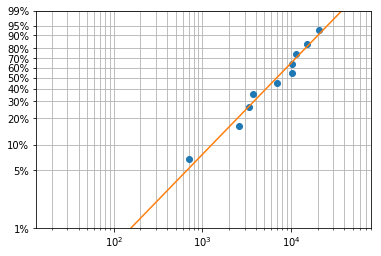

In [3]:
analysis.probplot()

Looks pretty decent in this case.  For completeness, we should look at the fit tests.

In [4]:
analysis.fit_test

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     271.5
Date:                Thu, 14 Dec 2017   Prob (F-statistic):           1.86e-07
Time:                        21:16:26   Log-Likelihood:                 3.9854
No. Observations:                  10   AIC:                            -3.971
Df Residuals:                       8   BIC:                            -3.366
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1668      0.064    143.079      0.000       9.019       9.315
x1             0.8946      0.054     16.479      0.000       0.769       1.020
==============================================================================
Omnibus:                        1.023   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.600   Jarque-Bera (JB):                0.715
Skew:                           0.303   Prob(JB):                        0.699
Kurtosis:                       1.839   Cond. No.                         1.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Plotting

The standard suite of plots are included...

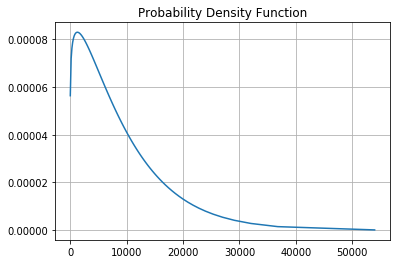

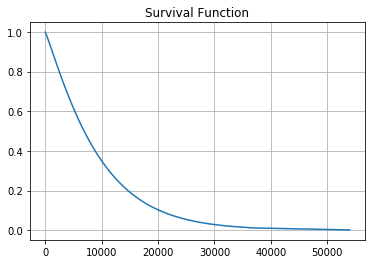

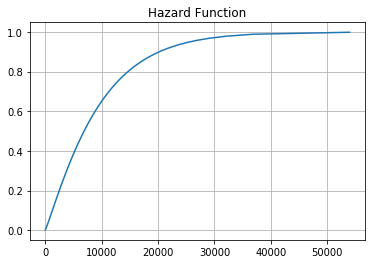

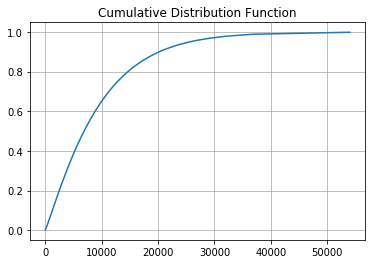

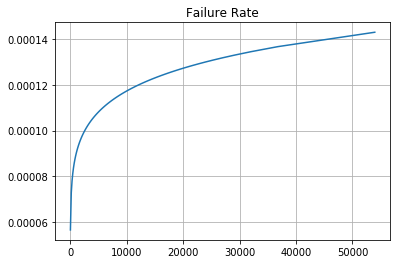

In [5]:
analysis.pdf()
analysis.sf()
analysis.hazard()
analysis.cdf()
analysis.fr()

I realize that there is some overlap in the plots - such as `cdf` and `hazard` - but having all of the functions defined makes it easier for the maximum number of user.

# Summary Data

Some customers insist on metrics such as MTTF, characteristic life, etc., so those are included as well.

Note that `mttf` and `mean` are the same metric.  Also note that `characteristic_life` is the same as `eta`, $\eta$.

In [6]:
print(f'MTTF: {analysis.mttf:.01f}')
print(f'mean life: {analysis.mean:.01f}')
print(f'median life: {analysis.median:.01f}')
print(f'characteristic life: {analysis.characteristic_life:.01f}')

MTTF: 9190.3
mean life: 9190.3
median life: 6897.3
characteristic life: 9573.8
